In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from statistics import mean
# center charts:

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [163]:
# Reading and merging data
plant1 = pd.read_csv('Plant_1_Generation_Data.csv', parse_dates = ['DATE_TIME'])
plant2 = pd.read_csv('Plant_2_Generation_Data.csv', parse_dates = ['DATE_TIME'])

In [164]:
plant1

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,2020-05-15 00:00:00,4135001.0,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,2020-05-15 00:00:00,4135001.0,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,2020-05-15 00:00:00,4135001.0,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,2020-05-15 00:00:00,4135001.0,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,4135001.0,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,2020-06-17 23:45:00,4135001.0,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,2020-06-17 23:45:00,4135001.0,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,2020-06-17 23:45:00,4135001.0,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [165]:
plant2

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001.0,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001.0,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001.0,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001.0,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001.0,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001.0,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001.0,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001.0,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001.0,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


In [166]:
data = pd.concat([plant1, plant2])

In [167]:
data

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15 00:00:00,4135001.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15 00:00:00,4135001.0,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15 00:00:00,4135001.0,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15 00:00:00,4135001.0,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001.0,q49J1IKaHRwDQnt,0.0,0.0,4157.0,520758.0
67694,2020-06-17 23:45:00,4136001.0,rrq4fwE8jgrTyWY,0.0,0.0,3931.0,121131356.0
67695,2020-06-17 23:45:00,4136001.0,vOuJvMaM2sgwLmb,0.0,0.0,4322.0,2427691.0
67696,2020-06-17 23:45:00,4136001.0,xMbIugepa2P7lBB,0.0,0.0,4218.0,106896394.0


In [168]:
# filter rows from missing data
data = data[data[['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY','DC_POWER','AC_POWER','DAILY_YIELD','TOTAL_YIELD']].notnull().all(1)] # skomplikował Pan rzecz prostą: data.dropna()

In [169]:
data

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15 00:00:00,4135001.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15 00:00:00,4135001.0,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15 00:00:00,4135001.0,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15 00:00:00,4135001.0,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001.0,q49J1IKaHRwDQnt,0.0,0.0,4157.0,520758.0
67694,2020-06-17 23:45:00,4136001.0,rrq4fwE8jgrTyWY,0.0,0.0,3931.0,121131356.0
67695,2020-06-17 23:45:00,4136001.0,vOuJvMaM2sgwLmb,0.0,0.0,4322.0,2427691.0
67696,2020-06-17 23:45:00,4136001.0,xMbIugepa2P7lBB,0.0,0.0,4218.0,106896394.0


In [179]:
# draw AC_POWER chart for selected generator in selected week
one_week_df = data[ (data['DATE_TIME'] >= "2020-05-17 00:00")
                           & (data['DATE_TIME'] <= "2020-05-24 00:00")]
# one_week_df
one_generator_df = one_week_df[one_week_df["SOURCE_KEY"].str.contains("1BY6WEcLGh8j5v7")]

In [180]:
one_generator_df

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
3888,2020-05-17 00:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.00,6271605.0
3910,2020-05-17 00:15:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.00,6271605.0
3932,2020-05-17 00:30:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.00,6271605.0
3954,2020-05-17 00:45:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.00,6271605.0
3976,2020-05-17 01:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.00,6271605.0
...,...,...,...,...,...,...,...
17040,2020-05-23 23:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,7966.00,6320403.0
17062,2020-05-23 23:15:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,7966.00,6320403.0
17084,2020-05-23 23:30:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,7966.00,6320403.0
17106,2020-05-23 23:45:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,7966.00,6320403.0


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
3888,2020-05-17 00:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.00,6271605.0
3910,2020-05-17 00:15:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.00,6271605.0
3932,2020-05-17 00:30:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.00,6271605.0
3954,2020-05-17 00:45:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.00,6271605.0
3976,2020-05-17 01:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.00,6271605.0
...,...,...,...,...,...,...,...
17040,2020-05-23 23:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,7966.00,6320403.0
17062,2020-05-23 23:15:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,7966.00,6320403.0
17084,2020-05-23 23:30:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,7966.00,6320403.0
17106,2020-05-23 23:45:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,7966.00,6320403.0


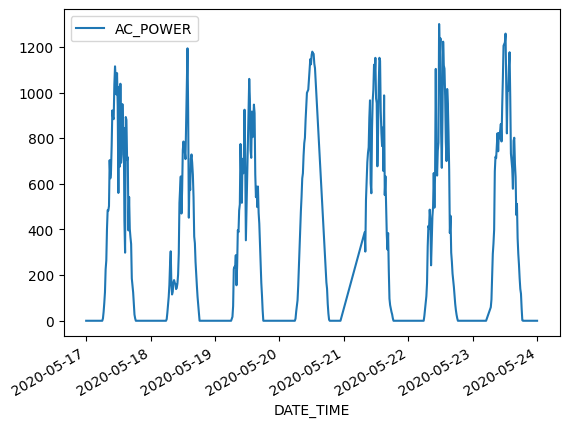

In [219]:
one_generator_df.plot(x="DATE_TIME", y=["AC_POWER"])
one_generator_df

In [208]:
# show the average AC_POWER for all generators
one_week_df

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
3888,2020-05-17,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6.271605e+06
3889,2020-05-17,4135001.0,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6.196594e+06
3890,2020-05-17,4135001.0,3PZuoBAID5Wc2HD,0.0,0.0,0.000,7.000689e+06
3891,2020-05-17,4135001.0,7JYdWkrLSPkdwr4,0.0,0.0,807.625,7.615537e+06
3892,2020-05-17,4135001.0,McdE0feGgRqW7Ca,0.0,0.0,0.000,7.172021e+06
...,...,...,...,...,...,...,...
17153,2020-05-24,4136001.0,oZZkBaNadn6DNKz,0.0,0.0,0.000,1.708138e+09
17154,2020-05-24,4136001.0,q49J1IKaHRwDQnt,0.0,0.0,3254.000,3.867580e+05
17155,2020-05-24,4136001.0,rrq4fwE8jgrTyWY,0.0,0.0,213.000,1.210135e+08
17156,2020-05-24,4136001.0,vOuJvMaM2sgwLmb,0.0,0.0,0.000,2.274933e+06


In [223]:
# one_week_df['AVERAGE'] = one_week_df.groupby('DATE_TIME')['AC_POWER'].transform(mean)
ave_df = pd.DataFrame(one_week_df.groupby('DATE_TIME')['AC_POWER'].agg(mean))

ave_df

,AC_POWER
DATE_TIME,
2020-05-17 00:00:00,0.0
2020-05-17 00:15:00,0.0
2020-05-17 00:30:00,0.0
2020-05-17 00:45:00,0.0
2020-05-17 01:00:00,0.0
...,...
2020-05-23 23:00:00,0.0
2020-05-23 23:15:00,0.0
2020-05-23 23:30:00,0.0


<AxesSubplot: xlabel='DATE_TIME'>

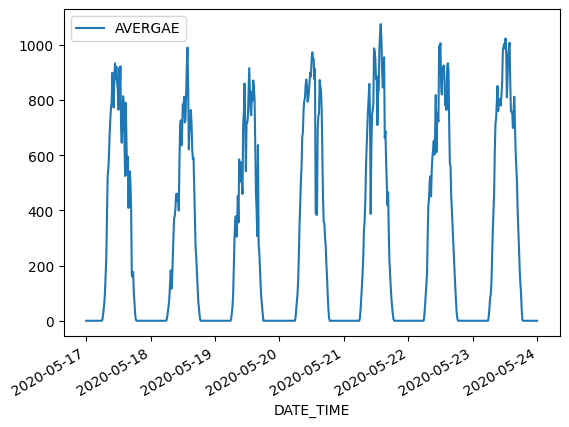

In [217]:
# one_week_df.plot(x="DATE_TIME", y=["AVERGAE"])
# to nie jest na tym samym wykresie